In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import os
import random 
import matplotlib.image as mpimg
import pathlib

In [5]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4


In [6]:
def view_random_pic(target_dir,target_class):
    """Takes a target directory and a target class and displays random pictures"""
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img
    

['2600361.jpg']


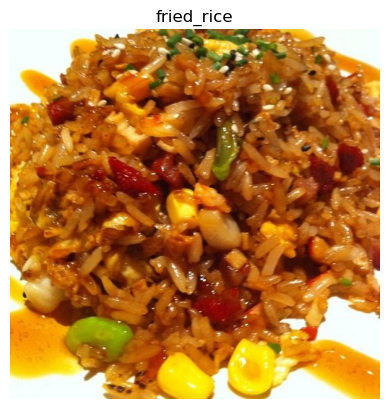

In [9]:
img = view_random_pic("/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/10_food_classes_all_data/train/","fried_rice")

## Getting Data ready

In [13]:
data_dir = pathlib.Path("10_food_classes_all_data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [14]:
train_datagen = ImageDataGenerator(rescale=1./512,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./412,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

train_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/10_food_classes_all_data/train"
test_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/10_food_classes_all_data/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=16,target_size=(512,512),class_mode="categorical",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,batch_size=16,target_size=(512,512),class_mode="categorical",seed=42,shuffle=True)
len(train_data),len(test_data)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(469, 157)

## Making the model

In [84]:
model = Sequential([
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',input_shape=(512,512,3),padding='valid'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=2,padding='valid'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=2,padding='valid'),
    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=2,padding='valid'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [85]:
history = model.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 468s 987ms/step - accuracy: 0.1273 - loss: 2.2787 - val_accuracy: 0.1768 - val_loss: 2.1791
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 468s 992ms/step - accuracy: 0.1893 - loss: 2.1920 - val_accuracy: 0.2084 - val_loss: 2.1348
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.2052 - loss: 2.1385 - val_accuracy: 0.2304 - val_loss: 2.0979
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 477s 1s/step - accuracy: 0.2358 - loss: 2.1048 - val_accuracy: 0.2572 - val_loss: 2.0244
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.2778 - loss: 2.0344 - val_accuracy: 0.3128 - val_loss: 1.9594
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 464s 983ms/step - accuracy: 0.2870 - loss: 2.0030 - val_accuracy: 0.3208 - val_loss: 1.9198
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 464s 983ms/step - accuracy: 0.2943 - loss: 1.9720 - val_accuracy: 0.3556 - val_loss: 1.8435
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 466s 987ms/step - accuracy: 0.3122 - loss: 1.

<Axes: >

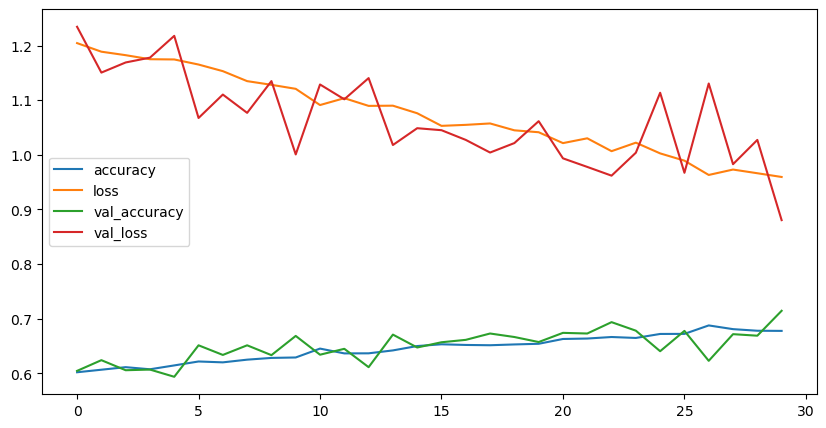

In [110]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [15]:
model.save("MultiClass.keras")

In [16]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_497 (Conv2D)             │ (None, 510, 510, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_498 (Conv2D)             │ (None, 508, 508, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_281               │ (None, 254, 254, 64)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_499 (Conv2D)             │ (None, 252, 252, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_500 (Conv2D)             │ (None, 250, 250, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_282               │ (None, 125, 125, 64)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_501 (Conv2D)             │ (None, 123, 123, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_502 (Conv2D)             │ (None, 121, 121, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_283               │ (None, 60, 60, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_503 (Conv2D)             │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_504 (Conv2D)             │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_284               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_505 (Conv2D)             │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_506 (Conv2D)             │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_285               │ (None, 12, 12, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_507 (Conv2D)             │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_508 (Conv2D)             │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_286               │ (None, 4, 4, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,752 (5.43 MB)

 Trainable params: 474,250 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 948,502 (3.62 MB)

In [17]:
model.evaluate(test_data)

2024-08-24 10:57:57.277641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/veerjyotsammi/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 340ms/step - accuracy: 0.7233 - loss: 0.8514


[0.8829406499862671, 0.7143999934196472]

In [101]:
def load_and_prep_image(filename , img_shape = 512):
    """Reads image from filename ,make a tensor and reshapes it to (img_shape,img_shape,3)"""
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=(img_shape,img_shape))
    img /= 512.
    return img

def pred_and_plot(filename , model):
    img = load_and_prep_image(filename)
    plt.imshow(img)
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = class_names[np.argmax(pred)]
    plt.title(pred)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


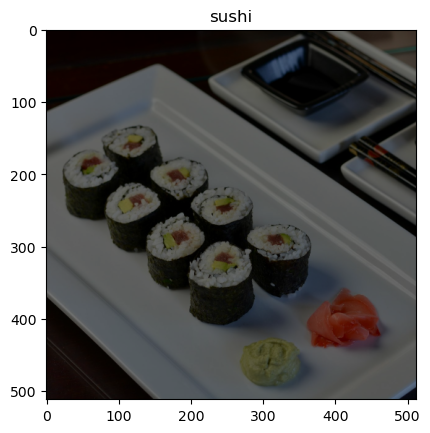

In [104]:
pred_and_plot("/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/CustomSushi.jpeg",model)

In [18]:
model = tf.keras.models.load_model("MultiClass.keras")

In [19]:
history = model.fit(train_data,epochs=30,validation_data=test_data)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 477s 1s/step - accuracy: 0.6844 - loss: 0.9672 - val_accuracy: 0.6948 - val_loss: 0.9346
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 480s 1s/step - accuracy: 0.6942 - loss: 0.9229 - val_accuracy: 0.7032 - val_loss: 0.9299
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 469s 995ms/step - accuracy: 0.6988 - loss: 0.9361 - val_accuracy: 0.6580 - val_loss: 1.0366
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 456s 968ms/step - accuracy: 0.6821 - loss: 0.9457 - val_accuracy: 0.7164 - val_loss: 0.8700
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 461s 978ms/step - accuracy: 0.6953 - loss: 0.9197 - val_accuracy: 0.6892 - val_loss: 0.9404
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 464s 985ms/step - accuracy: 0.7006 - loss: 0.9181 - val_accuracy: 0.6592 - val_loss: 1.0340
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 465s 986ms/step - accuracy: 0.6946 - loss: 0.9264 - val_accuracy: 0.7272 - val_loss: 0.8540
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 463s 983ms/step - accuracy: 0.6960 - loss:

In [22]:
model.save("MultiClass.keras")

In [21]:
model.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 339ms/step - accuracy: 0.7043 - loss: 0.8948


[0.880225658416748, 0.7111999988555908]